In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

C:\Users\Koki\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
df = pd.read_table('http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',  sep='\\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', \
                  'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B', 'LSTAT', 'MDEV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MDEV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MDEV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
random.seed(3277)
training, testing = train_test_split(df, test_size = 0.25)
print(training.shape)
print(testing.shape)

(378, 14)
(127, 14)


In [15]:
regr = linear_model.LinearRegression()
training_data = training.drop('MDEV', axis = 1)
training_test = training.iloc[:,-1]
print(training_data.shape)
print(training_test.shape)

(378, 13)
(378,)


In [20]:
lfit = regr.fit(training_data,training_test)
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ -9.63259398e-02   5.12195812e-02   3.95249014e-02   1.42228216e+00
  -1.96109094e+01   3.55700326e+00   9.35875785e-03  -1.55124014e+00
   3.54732718e-01  -1.52433155e-02  -1.10224079e+00   8.40824574e-03
  -5.36668885e-01]


In [26]:
testing_data = testing.loc[:, ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', \
                  'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B', 'LSTAT']]
testing_test = testing[['MDEV']].as_matrix()
print(testing_data.shape)
print(testing_test.shape)

(127, 13)
(127, 1)


In [28]:
prediction_of_test = regr.predict(testing_data)

In [30]:
sum = 0
rows = len(testing_test)
for i in range(rows):
    test = testing_test[i]
    prediction = prediction_of_test[i]
    diff = (test - prediction) ** 2
    sum = sum + diff
mse = sum / rows
print("MSE ", mse)

MSE  [ 26.68715546]


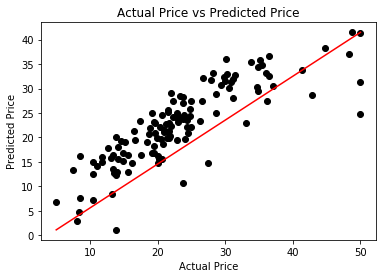

In [31]:
%matplotlib inline
plt.scatter(testing_test, prediction_of_test, color='black')

x0 = min(testing_test)
x1 = max(testing_test)
y0 = min(prediction_of_test)
y1 = max(prediction_of_test)
plt.plot([x0,x1],[y0,y1], color="red")

#add labels
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
          
plt.show()